# Quantal Response Equilibrium (QRE) with Pygambit

This notebook demonstrates how to calculate QRE for a 3x3 symmetric game using the pygambit library.

In [49]:
import pygambit as gbt
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Define a 3x3 payoff matrix for player 1
# This could represent something like Rock-Paper-Scissors with unequal payoffs
payoff_matrix = np.array([
    [5, 3, 1],
    [2, 6, 0],
    [4, 3, 5]
])

# For a symmetric game, player 2's payoffs are the transpose
player1_payoffs = payoff_matrix
player2_payoffs = payoff_matrix.T

print("Player 1 payoff matrix:")
print(player1_payoffs)
print("\nPlayer 2 payoff matrix:")
print(player2_payoffs)

Player 1 payoff matrix:
[[5 3 1]
 [2 6 0]
 [4 3 5]]

Player 2 payoff matrix:
[[5 2 4]
 [3 6 3]
 [1 0 5]]


In [51]:
# Create a game from the payoff matrices
g = gbt.Game.from_arrays(
    player1_payoffs,
    player2_payoffs,
    title="3x3 Symmetric Game Example"
)

# Set player and strategy names for clarity
g.players[0].label = "Player 1"
g.players[1].label = "Player 2"

for i in range(3):
    g.players[0].strategies[i].label = f"S{i+1}"
    g.players[1].strategies[i].label = f"S{i+1}"

# Display game information
print(g)
print(f"\nNumber of players: {len(g.players)}")
print(f"Number of strategies per player: {[len(p.strategies) for p in g.players]}")
for s in g.players[0].strategies:
    print(s)

Game(title='3x3 Symmetric Game Example')

Number of players: 2
Number of strategies per player: [3, 3]
Strategy(player=Player(game=Game(title='3x3 Symmetric Game Example'), label='Player 1'), label='S1')
Strategy(player=Player(game=Game(title='3x3 Symmetric Game Example'), label='Player 1'), label='S2')
Strategy(player=Player(game=Game(title='3x3 Symmetric Game Example'), label='Player 1'), label='S3')


## Calculate QRE for λ = 1.0

Now let's compute the Quantal Response Equilibrium for λ = 1.0

In [53]:
# Calculate QRE at lambda = 1.0
lambda_value = 1.0
qre_profile = gbt.qre.logit_solve_lambda(g, lam=[lambda_value])[0]

print(f"QRE at λ = {lambda_value}:")
print(f"\nPlayer 1 mixed strategy:")
player1_probs = [float(qre_profile.profile[g.players[0]][s]) for s in g.players[0].strategies]
for i, prob in enumerate(player1_probs):
    print(f"  S{i+1}: {prob:.4f}")

print(f"\nPlayer 2 mixed strategy:")
player2_probs = [float(qre_profile.profile[g.players[1]][s]) for s in g.players[1].strategies]
for i, prob in enumerate(player2_probs):
    print(f"  S{i+1}: {prob:.4f}")

QRE at λ = 1.0:

Player 1 mixed strategy:
  S1: 0.0203
  S2: 0.0074
  S3: 0.9723

Player 2 mixed strategy:
  S1: 0.0203
  S2: 0.0074
  S3: 0.9723


In [59]:
# Calculate QRE for multiple lambda values
lambda_values = np.logspace(-2, 2, 50)  # From 0.01 to 100
qre_profiles = gbt.qre.logit_solve_lambda(g, lam=lambda_values.tolist())

# Extract probabilities for each strategy
player1_probs_all = np.array([[float(profile.profile[g.players[0]][s]) for s in g.players[0].strategies]
                                     for profile in qre_profiles])
player2_probs_all = np.array([[float(profile.profile[g.players[1]][s]) for s in g.players[1].strategies]
                                     for profile in qre_profiles])

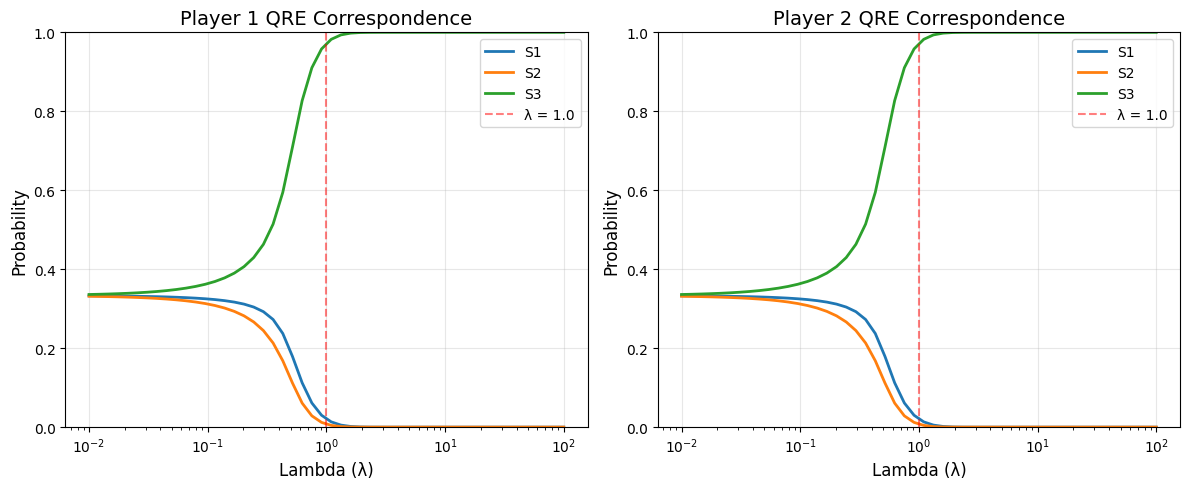

In [60]:
# Plot QRE correspondence
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Player 1 strategies
for i in range(3):
    ax1.semilogx(lambda_values, player1_probs_all[:, i], label=f'S{i+1}', linewidth=2)

ax1.axvline(x=1.0, color='red', linestyle='--', alpha=0.5, label='λ = 1.0')
ax1.set_xlabel('Lambda (λ)', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Player 1 QRE Correspondence', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 1])

# Player 2 strategies
for i in range(3):
    ax2.semilogx(lambda_values, player2_probs_all[:, i], label=f'S{i+1}', linewidth=2)

ax2.axvline(x=1.0, color='red', linestyle='--', alpha=0.5, label='λ = 1.0')
ax2.set_xlabel('Lambda (λ)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Player 2 QRE Correspondence', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()